# Fraud Detection Using Machine Learning 

### Internship Task 7 - Data Analytics Internship
### Detecting Fraud Trasactions in Financial Data 

This project focuses on identifying fraud transactions using machine learning algorithms.

## Project Objectives

- Understand and explore transaction data
- Handly highly imbalanced datasets
- Detect fraud transactions using machine learning
- Build and evaluate classification models
- Analyze model performance using appropriate metrics 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.style.use("default")

In [2]:
df = pd.read_csv("C:/Users/agast/Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Overview 

The dataset contains credit card transactions made by European cardholders.
Each transaction is labeled as fraudulent or legitimate.


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Class Distribution 

Fraud detection datasets are highly imbalanced.
Understanding class distribution is cruicial.

In [5]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

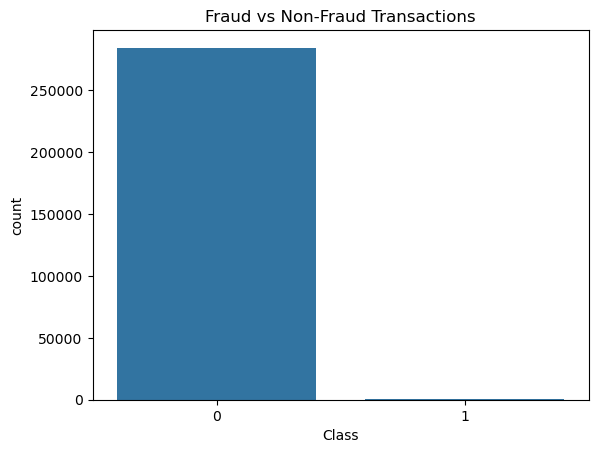

In [6]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


## Data Preprocessing

The dataset does not contain missing values.
However, feature scaling is applied to improve model performance.


In [7]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


In [8]:
X = df.drop('Class', axis=1)
y = df['Class']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Fraud Detection model 

In [13]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [14]:
y_pred = model.predict(X_test)


## Model Evaluation

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9991748885221726
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.66      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



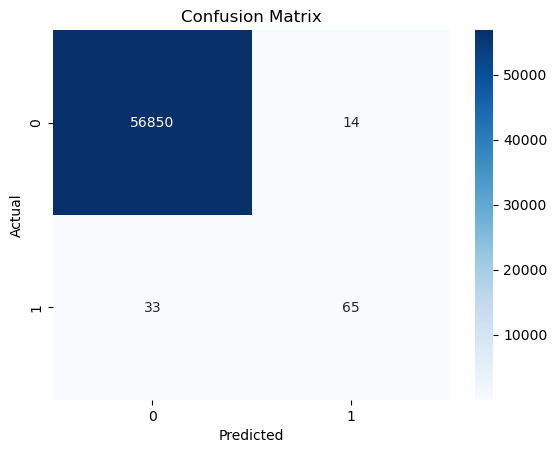

In [17]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Key Insights

- Fraud detection involves highly imbalanced data
- Accuracy alone is not sufficient for evaluation
- Logistic Regression provides a simple and interpretable baseline
- Feature scaling improves detection performance


## Conclusion

This project demonstrates how machine learning techniques
can be applied to detect fraudulent transactions.
Fraud detection systems play a critical role in
preventing financial losses and ensuring security.
